In [ ]:
!pip install pycaret

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/distan_lat42.225lon-8.63p10R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
import pandas as pd
station_all=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_station/LEVX.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
station_all


,temp_o,tempd_o,rh_o,dir_o,spd_o,wind_gust_o,mslp_o,visibility_o,skyc1_o,skyc2_o,skyc3_o,skyl1_o,skyl2_o,skyl3_o,wxcodes_o,metar_o,fr_o
time,,,,,,,,,,,,,,,,,
2008-01-01 00:00:00,278.550001,277.950000,95.91,220.0,3.601108,M,1023.0,9994.0,M,M,M,M,M,M,M,LEVX 010000Z AUTO 22007KT 9SM 05/05 A3021 RMK ...,VFR
2008-01-01 01:00:00,278.050000,277.450001,95.89,230.0,3.086664,M,NaN,NaN,M,M,M,M,M,M,M,LEVX 010100Z AUTO 23006KT 05/04 RMK SLP235 T00...,VFR
2008-01-01 02:00:00,278.050000,277.649999,97.24,190.0,5.144440,M,1022.0,9656.0,M,M,M,M,M,M,M,LEVX 010200Z AUTO 19010KT 6SM 05/04 A3018 RMK ...,VFR
2008-01-01 02:30:00,276.150001,275.149999,93.14,240.0,3.601108,M,1021.0,9656.0,M,M,M,M,M,M,M,LEVX 010230Z AUTO 24007KT 6SM 03/02 A3015 RMK ...,VFR
2008-01-01 03:00:00,278.750001,277.549999,91.98,230.0,3.086664,M,1022.0,9994.0,M,M,M,M,M,M,M,LEVX 010300Z AUTO 23006KT 9SM 06/04 A3018 RMK ...,VFR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 21:30:00,278.150000,278.150000,100.00,50.0,2.572220,M,1028.0,9994.0,M,M,M,M,M,M,M,LEVX 242130Z 05005KT 020V080 CAVOK 05/05 Q1028...,VFR
2020-12-24 22:00:00,278.150000,277.150000,93.24,60.0,2.057776,M,1028.0,9994.0,M,M,M,M,M,M,M,LEVX 242200Z 06004KT 030V110 CAVOK 05/04 Q1028...,VFR
2020-12-24 22:30:00,278.150000,277.150000,93.24,80.0,1.543332,M,1028.0,9994.0,M,M,M,M,M,M,M,LEVX 242230Z 08003KT 340V150 CAVOK 05/04 Q1028...,VFR


In [4]:
from pandas.core.algorithms import value_counts
pd.options.display.max_rows = 999
#station.value_counts()
station=station_all[["temp_o","wxcodes_o"]].astype(str)
station["wxcodes_o"].value_counts(dropna=True,normalize=True)

M                 0.814456
BCFG              0.046308
FG                0.020785
BR                0.014783
-RA               0.013204
VCFG              0.008877
RA                0.008567
-RA BCFG          0.006626
RA BCFG           0.005710
SHRA              0.003612
-RA BR            0.003477
RA BR             0.003149
BCFG -RA          0.002875
-RA FG            0.002848
BCFG RA           0.002595
-DZ               0.002578
-DZ BCFG          0.002543
RA FG             0.002386
PRFG              0.002329
DZ                0.001972
BCFG DZ           0.001740
BCFG -DZ          0.001740
DZ BCFG           0.001714
-DZ FG            0.001348
FG DZ             0.001309
-DZ BR            0.001243
-SHRA             0.001243
BR BCFG           0.001016
FG -DZ            0.000999
FG -RA            0.000990
DZ FG             0.000925
DZ BR             0.000872
FG RA             0.000776
VCSH              0.000563
-RADZ BCFG        0.000506
-RA VCFG          0.000502
BR RA             0.000489
B

In [5]:
station["brfg_l"]="No BR/FG"
mask=station['wxcodes_o'].str.contains("BR")
station.loc[mask,["brfg_l"]]="BR/FG"
mask=station['wxcodes_o'].str.contains("FG")
station.loc[mask,["brfg_l"]]= "BR/FG"
station=station.drop(columns=["temp_o"])
print(station.value_counts())
print(station.sample(40))

wxcodes_o       brfg_l  
M               No BR/FG    186714
BCFG            BR/FG        10616
FG              BR/FG         4765
BR              BR/FG         3389
-RA             No BR/FG      3027
VCFG            BR/FG         2035
RA              No BR/FG      1964
-RA BCFG        BR/FG         1519
RA BCFG         BR/FG         1309
SHRA            No BR/FG       828
-RA BR          BR/FG          797
RA BR           BR/FG          722
BCFG -RA        BR/FG          659
-RA FG          BR/FG          653
BCFG RA         BR/FG          595
-DZ             No BR/FG       591
-DZ BCFG        BR/FG          583
RA FG           BR/FG          547
PRFG            BR/FG          534
DZ              No BR/FG       452
BCFG DZ         BR/FG          399
BCFG -DZ        BR/FG          399
DZ BCFG         BR/FG          393
-DZ FG          BR/FG          309
FG DZ           BR/FG          300
-DZ BR          BR/FG          285
-SHRA           No BR/FG       285
BR BCFG         BR/FG         

In [ ]:
station["brfg_l"].value_counts(normalize=True)

No BR/FG    0.849562
BR/FG       0.150438
Name: brfg_l, dtype: float64

**Forecast D0**

In [6]:
#ria forecast d0
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD0.csv",parse_dates=["time"]).set_index("time")
model4k.columns

Index(['dir0', 'mod0', 'wind_gust0', 'mslp0', 'temp0', 'rh0', 'visibility0',
       'lhflx0', 'lwflx0', 'conv_prec0',
       ...
       'cape9', 'cin9', 'cfh9', 'cfl9', 'cfm9', 'cft9', 'HGT5009', 'HGT8509',
       'T5009', 'T8509'],
      dtype='object', length=230)

In [7]:
#concat station model
df_all4k=pd.concat([station,model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["wxcodes_o"])


**machine learning d0**

In [8]:
from pycaret.classification import *
#drop variables model labeled
clas = setup(df_all4k,
             target = 'brfg_l',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=True,
             fix_imbalance=False,ignore_low_variance=True,feature_selection=True,
             feature_selection_threshold =.15,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)

              

,Description,Value
0,session_id,20
1,Target,brfg_l
2,Target Type,Binary
3,Label Encoded,"BR/FG: 0, No BR/FG: 1"
4,Original Data,"(106310, 231)"
5,Missing Values,False
6,Numeric Features,230
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [23]:
compare_models(fold=5,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8937,0.8876,0.9790,0.9056,0.9408,0.4250,0.4592,8.310
rf,Random Forest Classifier,0.8923,0.8814,0.9789,0.9042,0.9401,0.4142,0.4493,28.478
lightgbm,Light Gradient Boosting Machine,0.8906,0.8825,0.9764,0.9045,0.9391,0.4115,0.4428,1.898
ada,Ada Boost Classifier,0.8817,0.8568,0.9651,0.9043,0.9337,0.3886,0.4074,10.986
lr,Logistic Regression,0.8702,0.8085,0.9800,0.8826,0.9288,0.2206,0.2689,8.466
ridge,Ridge Classifier,0.8688,0.0000,0.9813,0.8805,0.9282,0.1998,0.2506,0.126
dummy,Dummy Classifier,0.8635,0.5000,1.0000,0.8635,0.9267,0.0000,0.0000,0.102
lda,Linear Discriminant Analysis,0.8642,0.8202,0.9549,0.8949,0.9239,0.2988,0.3132,0.996
knn,K Neighbors Classifier,0.8567,0.7616,0.9501,0.8911,0.9197,0.2622,0.2743,44.906
qda,Quadratic Discriminant Analysis,0.8423,0.8109,0.9057,0.9112,0.9084,0.3417,0.3418,0.228


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=20, verbose=0,
                     warm_start=False)

In [9]:
model=create_model("lightgbm",n_estimators=150,fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8906,0.8842,0.9766,0.9043,0.9391,0.4105,0.4422
1,0.8914,0.8838,0.9767,0.9051,0.9395,0.4162,0.4475
2,0.8920,0.8898,0.9758,0.9064,0.9398,0.4250,0.4541
3,0.8900,0.8818,0.9752,0.9048,0.9387,0.4115,0.4409
4,0.8898,0.8824,0.9739,0.9056,0.9385,0.4148,0.4421
Mean,0.8908,0.8844,0.9756,0.9052,0.9391,0.4156,0.4454
SD,0.0009,0.0028,0.0010,0.0007,0.0005,0.0052,0.0049


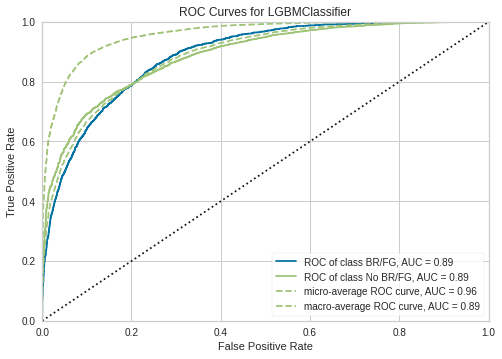

In [10]:
plot_model(model, plot = 'auc')

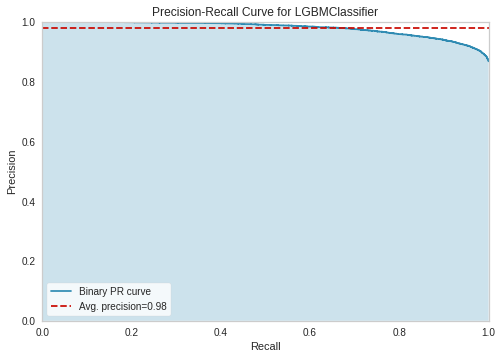

In [11]:
plot_model(model, plot = 'pr')

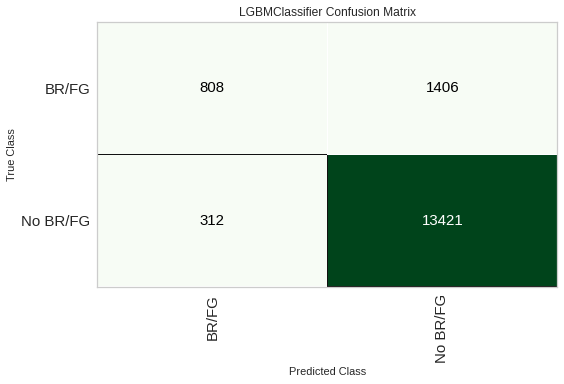

In [12]:
plot_model(model,'confusion_matrix')

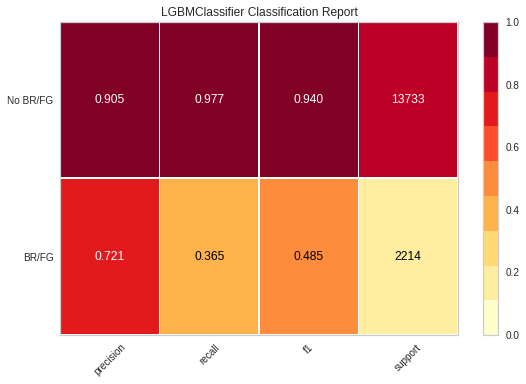

In [13]:
plot_model(model,'class_report')

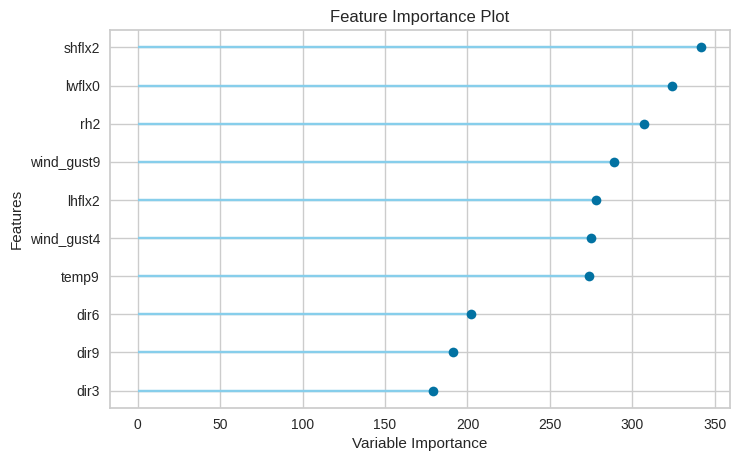

In [14]:
plot_model(model,"feature")

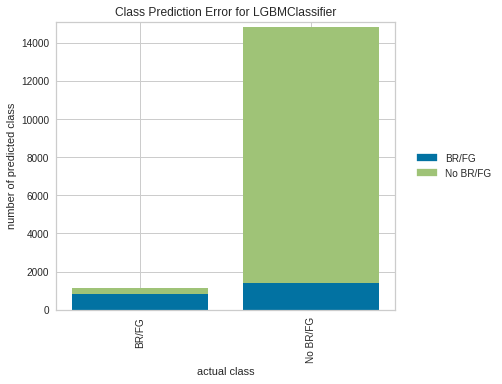

In [15]:
plot_model(model,"error")

**Export model**

In [16]:
x_var=get_config("X_train").columns
x_var

Index(['rh2', 'dir3', 'cfl4', 'cfl2', 'cfl3', 'dir9', 'cfl8', 'lhflx2',
       'visibility3', 'dir5', 'temp9', 'cfl9', 'dir6', 'visibility7',
       'visibility8', 'cfl0', 'cfl7', 'dir4', 'visibility1', 'shflx2',
       'visibility0', 'cfl5', 'wind_gust9', 'visibility2', 'visibility9',
       'cfl6', 'cfl1', 'lwflx0', 'wind_gust4'],
      dtype='object')

In [17]:
#define x and y
Y=df_all4k.brfg_l
X=df_all4k[x_var]

In [18]:
#Run the machine learning model
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
#ml_model=ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)
ml_model=LGBMClassifier(n_estimators=250).fit(X_train,y_train)


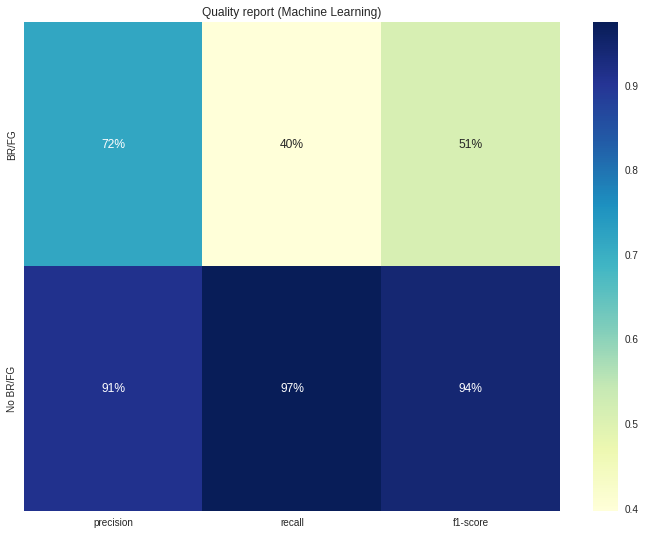

In [19]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Quality report (Machine Learning)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


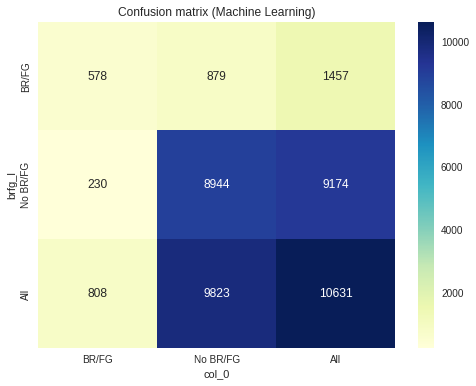

In [20]:
plt.figure(figsize=(8, 6))
plt.title("Confusion matrix (Machine Learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

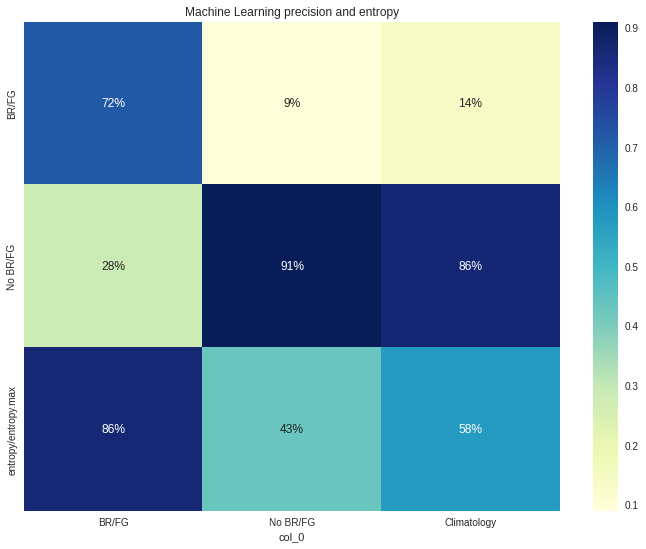

In [21]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Machine Learning precision and entropy")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [22]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("brfg_LEVX_d0.al", 'wb'))